## The Finals Survey Project

Author: Rony Guerra

Date: 2024-01-24

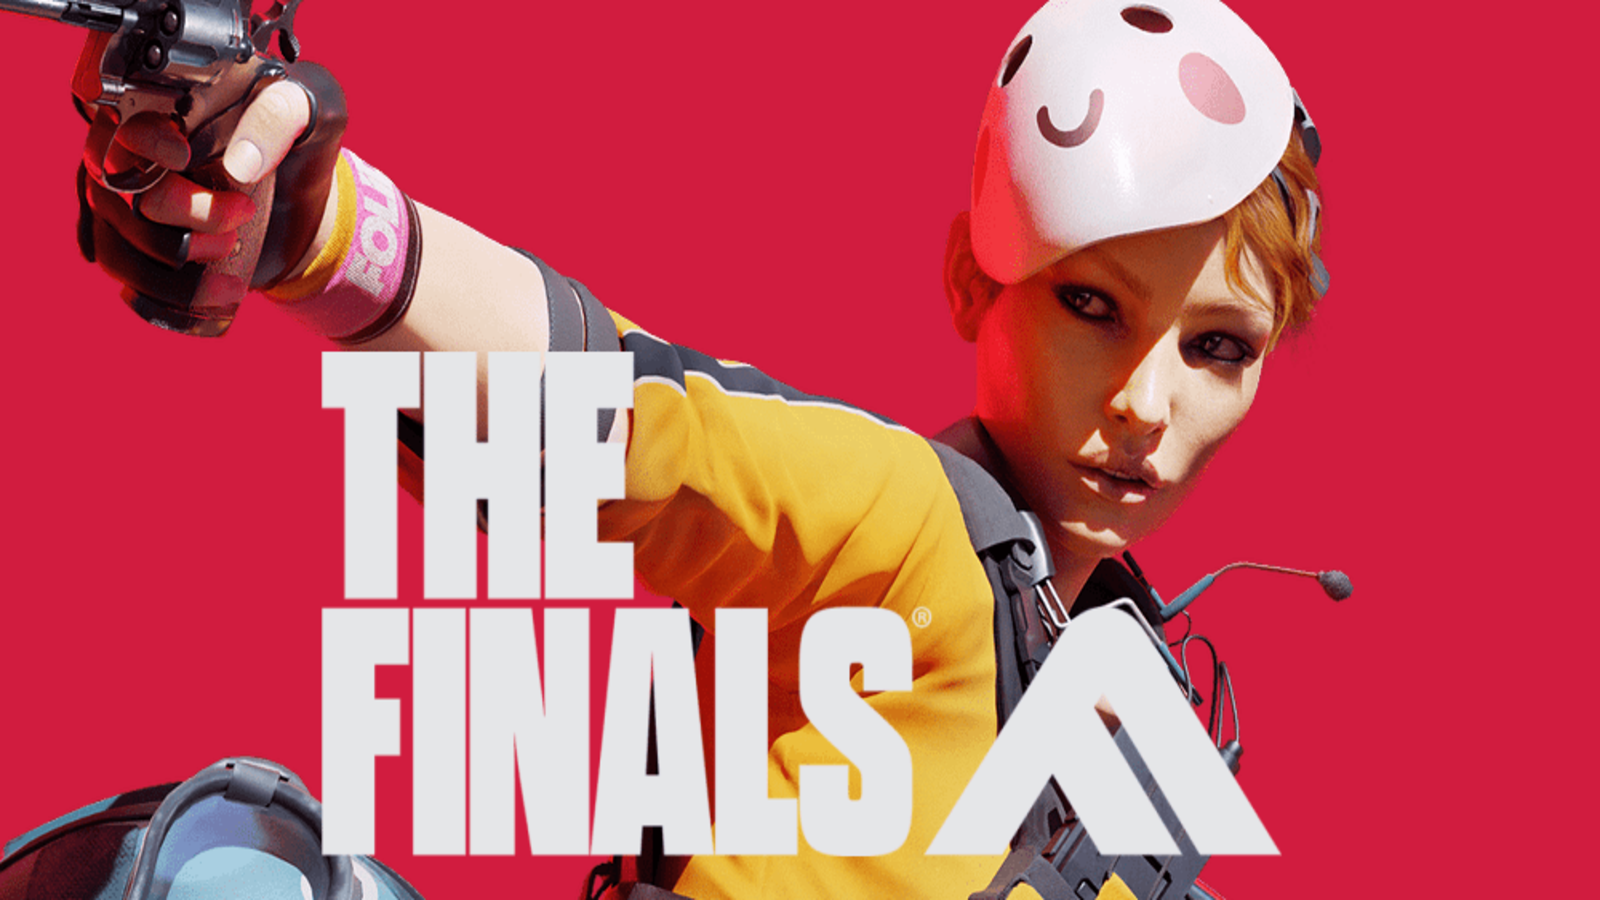

In [113]:
from IPython.display import Image
Image('the_finals_medium.png')

### Introduction

The dataset consists of survey responses from players of "The Finals," focusing on their experiences with the game's aim assist feature. Each entry details individual player opinions and provides insight into the community's reaction to recent changes in aim assist mechanics.

The aim of this analysis is to understand player sentiment toward these changes, to evaluate the impact on gameplay and competitiveness, and to offer data-driven recommendations for future game updates.

In [75]:
from wordcloud import WordCloud
from matplotlib import transforms, pyplot as plt
from matplotlib import pyplot as plt
from pandas import Series, DataFrame
from collections import Counter
import pandas as pd
import matplotlib
import numpy as np
import re

pd.set_option('display.max_columns', None)

In [76]:
pwd

'C:\\Users\\User\\OneDrive\\Portfolio Projects\\The Finals Player Feedback Survey'

In [77]:
excel_file_path = 'C:\\Users\\User\\OneDrive\\Portfolio Projects\\The Finals Player Feedback Survey\\finals_survey.xlsx'

In [78]:
df = pd.read_excel(excel_file_path, sheet_name='copy_data')
df.head()

,Respondent_ID,Timestamp,"1. Do you primarily use a controller or mouse and keyboard when playing ""The Finals""?","2. On which system do you play ""The Finals""?","3. How would you describe your overall experience with aim assist in ""The Finals"" BEFORE the recent changes?","4. How would you describe your overall experience with aim assist in ""The Finals"" AFTER the recent changes?",5. How would you rate the fairness of gameplay BEFORE the recent aim assist changes?,6. How would you rate the fairness of gameplay AFTER the recent aim assist changes?,7. Do you feel more or less competitive in matches following the aim assist changes?,"8. Has your playstyle or strategy in ""The Finals"" adapted due to the aim assist changes?",9. Please rate your satisfaction with the importance of the following changes in aim assist: [Max cap on zoom snapping angular velocity],9. Please rate your satisfaction with the importance of the following changes in aim assist: [Reduced Camera Magnetism],9. Please rate your satisfaction with the importance of the following changes in aim assist: [Reduced zoom snapping time],9. Please rate your satisfaction with the importance of the following changes in aim assist: [Removal of zoom snapping from specific weapons],9. Please rate your satisfaction with the importance of the following changes in aim assist: [Aim assist ignoring invisible players (light class ability)],"10. How do the recent aim assist changes in ""The Finals"" influence your overall player engagement? Please rate the impact of each factor on a scale from 1 to 5, where 1 is ""Not at all influential"" and 5 is ""extremely influential."" [How much do the recent aim changes impact your overall gaming experience in 'The Finals'?]","10. How do the recent aim assist changes in ""The Finals"" influence your overall player engagement? Please rate the impact of each factor on a scale from 1 to 5, where 1 is ""Not at all influential"" and 5 is ""extremely influential."" [To what extent do the recent aim changes influence your likelihood to recommend 'The Finals' to others?]","10. How do the recent aim assist changes in ""The Finals"" influence your overall player engagement? Please rate the impact of each factor on a scale from 1 to 5, where 1 is ""Not at all influential"" and 5 is ""extremely influential."" [How do the recent aim changes affect your intention to continue playing 'The Finals' in the future?]","10. How do the recent aim assist changes in ""The Finals"" influence your overall player engagement? Please rate the impact of each factor on a scale from 1 to 5, where 1 is ""Not at all influential"" and 5 is ""extremely influential."" [To what degree do the recent aim changes impact your enjoyment of playing 'The Finals'?]","10. How do the recent aim assist changes in ""The Finals"" influence your overall player engagement? Please rate the impact of each factor on a scale from 1 to 5, where 1 is ""Not at all influential"" and 5 is ""extremely influential."" [How do the opinions and feelings shared by the gaming community affect your perception and engagement with 'The Finals' after the recent aim changes?]",11. Have you observed a significant impact on your gameplay due to the recent changes in aim assist?,"12. Do you believe that recent changes in aim assist have the potential to discourage players, regardless of input method, from playing ""The Finals""?","13. Do you have any suggestions for how aim assist in ""The Finals"" could be improved or adjusted to better suit the player community?"
0,1,1/13/2024 21:26:11,Mouse and Keyboard,PC,Very negative,Very positive,Very Unfair,Very Fair,Much More Competitive,"No, stayed the same.",Satisfied,Satisfied,Neutral,Satisfied,Satisfied,4 - Very influential,4 - Very influential,4 - Very influential,4 - Very influential,2 - Slightly influential,"Yes, Positive Impact",Disagree,NaN
1,2,1/13/2024 21:33:16,Controller,Console,Positive,Very negative,Fair,Very Unfair,Much Less Competitive,Not sure,Neutral,Neut

In [79]:
# Melting the DataFrame to a long format with each response as a separate record
df_melted = df.melt(id_vars=['Respondent_ID', 'Timestamp'], 
                              var_name='Question', 
                              value_name='Response')

df_melted.head()

,Respondent_ID,Timestamp,Question,Response
0,1,1/13/2024 21:26:11,1. Do you primarily use a controller or mouse ...,Mouse and Keyboard
1,2,1/13/2024 21:33:16,1. Do you primarily use a controller or mouse ...,Controller
2,3,1/13/2024 21:34:07,1. Do you primarily use a controller or mouse ...,Controller
3,4,1/13/2024 21:53:28,1. Do you primarily use a controller or mouse ...,Controller
4,5,1/13/2024 21:56:26,1. Do you primarily use a controller or mouse ...,Mouse and Keyboard


In [80]:
# Creating a new function to handle the specific grid question formats for questions 9 and 10
def split_grid_questions_specific_v2(row):
    # Splitting the main question and sub-question for grid questions (9 and 10)
    if row['Question'].startswith('9.') or row['Question'].startswith('10.'):
        # Extracting the main question part (before the square bracket '[')
        main_question_part = row['Question'].split('[')[0].strip()
        # Extracting the sub-question part (inside the square brackets '[]')
        sub_question_part = row['Question'].split('[')[1].split(']')[0].strip()
        main_question = f"{main_question_part} [Grid Question]"
        sub_question = f"[{sub_question_part}]"
    else:
        # If it's not a grid question, keep the original question and set sub-question to None
        main_question = row['Question']
        sub_question = None

    return pd.Series([main_question, sub_question], index=['Main_Question', 'Sub_Question'])

# Apply the new function to split the grid questions
df_melted[['Main_Question', 'Sub_Question']] = df_melted.apply(split_grid_questions_specific_v2, axis=1)

# Display the updated DataFrame
df_melted[df_melted['Main_Question'].str.contains("9. |10. ")].head()

,Respondent_ID,Timestamp,Question,Response,Main_Question,Sub_Question
1168,1,1/13/2024 21:26:11,9. Please rate your satisfaction with the impo...,Satisfied,9. Please rate your satisfaction with the impo...,[Max cap on zoom snapping angular velocity]
1169,2,1/13/2024 21:33:16,9. Please rate your satisfaction with the impo...,Neutral,9. Please rate your satisfaction with the impo...,[Max cap on zoom snapping angular velocity]
1170,3,1/13/2024 21:34:07,9. Please rate your satisfaction with the impo...,Satisfied,9. Please rate your satisfaction with the impo...,[Max cap on zoom snapping angular velocity]
1171,4,1/13/2024 21:53:28,9. Please rate your satisfaction with the impo...,Satisfied,9. Please rate your satisfaction with the impo...,[Max cap on zoom snapping angular velocity]
1172,5,1/13/2024 21:56:26,9. Please rate your satisfaction with the impo...,Satisfied,9. Please rate your satisfaction with the impo...,[Max cap on zoom snapping angular velocity]


In [81]:
list(df_melted['Sub_Question'].unique())

[None,
 '[Max cap on zoom snapping angular velocity]',
 '[Reduced Camera Magnetism]',
 '[Reduced zoom snapping time]',
 '[Removal of zoom snapping from specific weapons]',
 '[Aim assist ignoring invisible players (light class ability)]',
 "[How much do the recent aim changes impact your overall gaming experience in 'The Finals'?]",
 "[To what extent do the recent aim changes influence your likelihood to recommend 'The Finals' to others?]",
 "[How do the recent aim changes affect your intention to continue playing 'The Finals' in the future?]",
 "[To what degree do the recent aim changes impact your enjoyment of playing 'The Finals'?]",
 "[How do the opinions and feelings shared by the gaming community affect your perception and engagement with 'The Finals' after the recent aim changes?]"]

In [82]:
df_melted['Sub_Question'] = df_melted['Sub_Question'].str.replace('[','', regex=False)\
                                                     .str.replace(']','', regex=False)\
                                                     .str.strip()

In [83]:
# Displaying the updated DataFrame
df_melted[df_melted['Main_Question'].str.contains("9. |10. ")].head()

,Respondent_ID,Timestamp,Question,Response,Main_Question,Sub_Question
1168,1,1/13/2024 21:26:11,9. Please rate your satisfaction with the impo...,Satisfied,9. Please rate your satisfaction with the impo...,Max cap on zoom snapping angular velocity
1169,2,1/13/2024 21:33:16,9. Please rate your satisfaction with the impo...,Neutral,9. Please rate your satisfaction with the impo...,Max cap on zoom snapping angular velocity
1170,3,1/13/2024 21:34:07,9. Please rate your satisfaction with the impo...,Satisfied,9. Please rate your satisfaction with the impo...,Max cap on zoom snapping angular velocity
1171,4,1/13/2024 21:53:28,9. Please rate your satisfaction with the impo...,Satisfied,9. Please rate your satisfaction with the impo...,Max cap on zoom snapping angular velocity
1172,5,1/13/2024 21:56:26,9. Please rate your satisfaction with the impo...,Satisfied,9. Please rate your satisfaction with the impo...,Max cap on zoom snapping angular velocity


In [84]:
df_melted['Question_Number'] = df_melted['Main_Question'].str.extract(r'(\d+)\.').astype(int)

In [85]:
df_melted.drop(columns=['Timestamp', 'Main_Question'], inplace=True)

In [86]:
#move column 'Response' to the end
data = df_melted[[col for col in df_melted.columns if col != 'Response'] + ['Response']]
data.head()

,Respondent_ID,Question,Sub_Question,Question_Number,Response
0,1,1. Do you primarily use a controller or mouse ...,None,1,Mouse and Keyboard
1,2,1. Do you primarily use a controller or mouse ...,None,1,Controller
2,3,1. Do you primarily use a controller or mouse ...,None,1,Controller
3,4,1. Do you primarily use a controller or mouse ...,None,1,Controller
4,5,1. Do you primarily use a controller or mouse ...,None,1,Mouse and Keyboard


In [111]:
# save to clean dataset to csv file
data.to_csv('the_finals_clean.csv', index=False)

In [88]:
def summarize_responses(data, question_number):
    # Filter responses for the specified question number
    question_df = data[data['Question_Number'] == question_number]
    
    # calculate value counts of responses
    response_counts = question_df['Response'].value_counts().reset_index()
    
    # calculate percentage of responses
    response_counts['Percentage'] = ((response_counts['Response'] 
                                    / response_counts['Response'].sum())*100).round(0).astype(int)
    
    # Rename columns for clarity
    response_counts.rename(columns={'index':'Response', 'Response':'Count'})
    
    return response_counts

In [89]:
question1_summary = summarize_responses(data, 1)
question1_summary.rename(columns={'index':'Response', 'Response':'Count'})

,Response,Count,Percentage
0,Controller,81,55
1,Mouse and Keyboard,65,45


In [90]:
question2_summary = summarize_responses(df_melted, 2)
question2_summary.rename(columns={'index':'System'})

,System,Response,Percentage
0,PC,81,55
1,Console,65,45


In [91]:
question3_summary = summarize_responses(df_melted, 3)
question3_summary

,index,Response,Percentage
0,Positive,36,25
1,Very negative,28,19
2,Neutral,28,19
3,Very positve,27,18
4,Negative,27,18


In [92]:
question4_summary = summarize_responses(df_melted, 4)
question4_summary

,index,Response,Percentage
0,Negative,41,28
1,Positive,39,27
2,Neutral,36,25
3,Very positive,15,10
4,Very negative,15,10


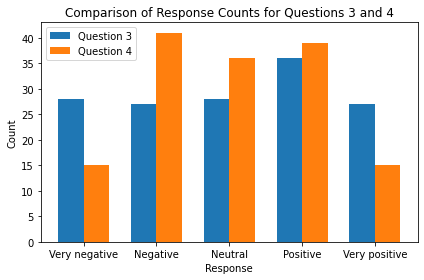

In [93]:
# Replace these with your actual data from question3_summary and question4_summary
q3_responses = ['Positive', 'Very negative', 'Neutral', 'Very positive', 'Negative']
q3_counts = [36, 28, 28, 27, 27]

q4_responses = ['Negative', 'Positive', 'Neutral', 'Very positive', 'Very negative']
q4_counts = [41, 39, 36, 15, 15]

# Aligning the responses in the same order for both questions
aligned_responses = ['Very negative', 'Negative', 'Neutral', 'Positive', 'Very positive']
aligned_q3_counts = [q3_counts[q3_responses.index(r)] if r in q3_responses else 0 for r in aligned_responses]
aligned_q4_counts = [q4_counts[q4_responses.index(r)] if r in q4_responses else 0 for r in aligned_responses]

# Creating the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(aligned_responses))

ax.bar(index, aligned_q3_counts, bar_width, label='Question 3')
ax.bar(index + bar_width, aligned_q4_counts, bar_width, label='Question 4')

ax.set_xlabel('Response')
ax.set_ylabel('Count')
ax.set_title('Comparison of Response Counts for Questions 3 and 4')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(aligned_responses)
ax.legend()

plt.xticks()
plt.tight_layout()
plt.show()

In [94]:
question5_summary = summarize_responses(data, 5)
question5_summary

,index,Response,Percentage
0,Unfair,50,34
1,Very Unfair,37,25
2,Fair,35,24
3,Neutral,18,12
4,Very Fair,6,4


In [95]:
question6_summary = summarize_responses(data, 6)
question6_summary

,index,Response,Percentage
0,Unfair,46,32
1,Fair,43,29
2,Neutral,37,25
3,Very Unfair,15,10
4,Very Fair,5,3


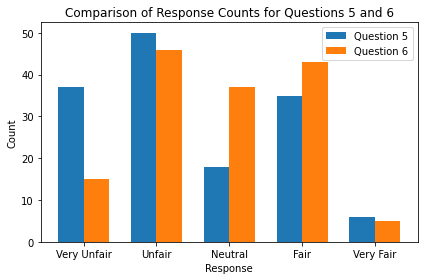

In [96]:
# Replace these with your actual data from question3_summary and question4_summary
q5_responses = ['Unfair', 'Very Unfair', 'Fair', 'Neutral', 'Very Fair']
q5_counts = [50, 37, 35, 18, 6]

q6_responses = ['Unfair', 'Fair', 'Neutral', 'Very Unfair', 'Very Fair']
q6_counts = [46, 43, 37, 15, 5]

# Aligning the responses in the same order for both questions
aligned_responses = ['Very Unfair', 'Unfair', 'Neutral', 'Fair', 'Very Fair']
aligned_q5_counts = [q5_counts[q5_responses.index(r)] if r in q5_responses else 0 for r in aligned_responses]
aligned_q6_counts = [q6_counts[q6_responses.index(r)] if r in q6_responses else 0 for r in aligned_responses]

# Creating the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(aligned_responses))

ax.bar(index, aligned_q5_counts, bar_width, label='Question 5')
ax.bar(index + bar_width, aligned_q6_counts, bar_width, label='Question 6')

ax.set_xlabel('Response')
ax.set_ylabel('Count')
ax.set_title('Comparison of Response Counts for Questions 5 and 6')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(aligned_responses)
ax.legend()

plt.xticks()
plt.tight_layout()
plt.show()

In [97]:
question7_summary = summarize_responses(data, 7)
question7_summary

,index,Response,Percentage
0,More Competitive,56,38
1,Less Competitive,32,22
2,No Change,25,17
3,Much Less Competitive,22,15
4,Much More Competitive,11,8


<BarContainer object of 5 artists>

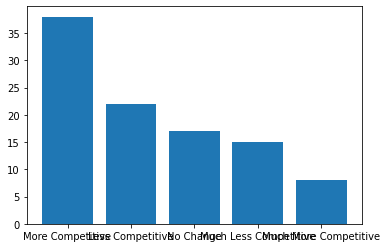

In [98]:
plt.bar(question7_summary['index'], question7_summary['Percentage'])

In [99]:
question8_summary = summarize_responses(data, 8)
question8_summary

,index,Response,Percentage
0,"No, stayed the same.",76,52
1,"Yes, somewhat changed.",40,27
2,"Yes, significantly changed.",21,14
3,Not sure,9,6


<BarContainer object of 4 artists>

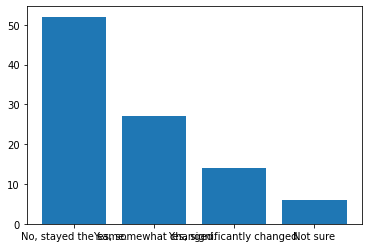

In [100]:
plt.bar(question8_summary['index'], question8_summary['Percentage'])

In [101]:
data.head()

,Respondent_ID,Question,Sub_Question,Question_Number,Response
0,1,1. Do you primarily use a controller or mouse ...,None,1,Mouse and Keyboard
1,2,1. Do you primarily use a controller or mouse ...,None,1,Controller
2,3,1. Do you primarily use a controller or mouse ...,None,1,Controller
3,4,1. Do you primarily use a controller or mouse ...,None,1,Controller
4,5,1. Do you primarily use a controller or mouse ...,None,1,Mouse and Keyboard


In [102]:
# Filter the data to include only question_number 9 and reshape the DataFrame to the desired format

# Filter for question_number 9
df_question_9 = data[data['Question_Number'] == 9]

# Pivot the table to get the count of responses for 'Dissatisfied', 'Neutral', 'Satisfied' per 'Sub_Question'
pivot_df = df_question_9.pivot_table(index='Sub_Question', 
                                     columns='Response', 
                                     aggfunc='size')

# Rename the columns to match the provided format
pivot_df.columns.name = "Column Labels"
pivot_df.index.name = "Row Labels"

# Reset index to make 'Row Labels' a column
pivot_df.reset_index(inplace=True)

# Display the reshaped DataFrame
pivot_df

Column Labels,Row Labels,Dissatisfied,Neutral,Satisfied
0,Aim assist ignoring invisible players (light c...,31,25,90
1,Max cap on zoom snapping angular velocity,29,45,72
2,Reduced Camera Magnetism,46,42,58
3,Reduced zoom snapping time,33,55,58
4,Removal of zoom snapping from specific weapons,45,29,72


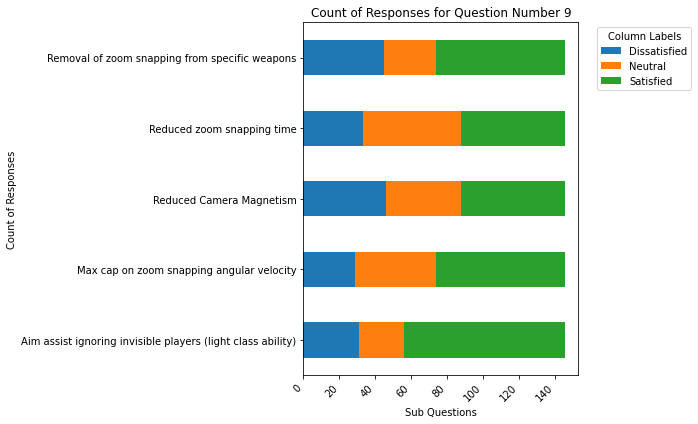

In [103]:
# Plotting the pivot table results
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot using the pivot table data
pivot_df.set_index('Row Labels').plot(kind='barh', ax=ax, stacked=True)

# Set the plot title and labels
ax.set_title('Count of Responses for Question Number 9')
ax.set_xlabel('Sub Questions')
ax.set_ylabel('Count of Responses')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend to the plot
plt.legend(title='Column Labels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [104]:
# Filter the data to include only question_number 10 and reshape the DataFrame to the desired format

# Filter for question_number 10
df_question_10 = data[data['Question_Number'] == 10]

# Pivot the table to get the count of responses for the ratings 1-5 per 'Sub_Question'
pivot_df_10 = df_question_10.pivot_table(index='Sub_Question', 
                                         columns='Response', 
                                         aggfunc='size', 
                                         fill_value=0)

# Rename the columns to match the provided format
pivot_df_10.columns.name = "Column Labels"
pivot_df_10.index.name = "Row Labels"

# Reset index to make 'Row Labels' a column
pivot_df_10.reset_index(inplace=True)

# Display the reshaped DataFrame
pivot_df_10

Column Labels,Row Labels,1 - Not at all influential,2 - Slightly influential,3 - Moderately influential,4 - Very influential,5 - Extremely influential
0,How do the opinions and feelings shared by the...,63,32,25,15,11
1,How do the recent aim changes affect your inte...,37,27,27,17,38
2,How much do the recent aim changes impact your...,19,34,44,25,24
3,To what degree do the recent aim changes impac...,20,29,33,25,39
4,To what extent do the recent aim changes influ...,38,20,37,23,28


C:\Users\User\AppData\Local\Temp\ipykernel_6688\2938104274.py:24: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



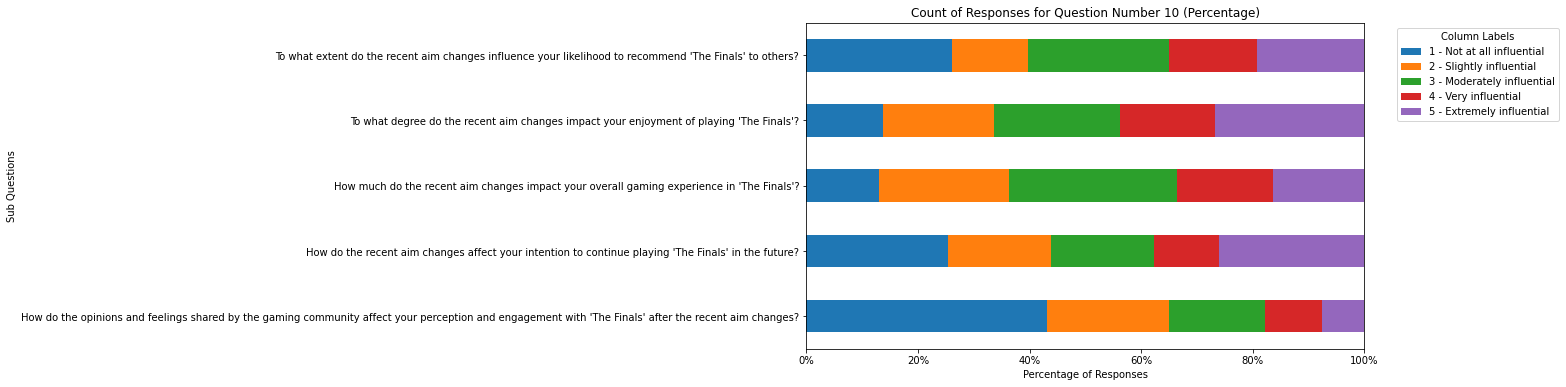

In [105]:
# Plotting the pivot table results for question 10 as a horizontal 100% stacked bar chart

fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the percentage for each category
pivot_percentage_10 = pivot_df_10.set_index('Row Labels').apply(lambda x: x / x.sum() * 100, axis=1)

# Horizontal 100% stacked bar plot using the percentage data
pivot_percentage_10.plot(kind='barh', ax=ax, stacked=True)

# Set the plot title and labels
ax.set_title('Count of Responses for Question Number 10 (Percentage)')
ax.set_xlabel('Percentage of Responses')
ax.set_ylabel('Sub Questions')

# Set the x-axis to display percentages
ax.set_xlim(0, 100)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Add a legend to the plot
plt.legend(title='Column Labels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [106]:
# Filter for question_number 10
df_question_13 = data[data['Question_Number'] == 13]

In [107]:
not_blank = df_question_13[df_question_13['Response'].notna()]
responses = list(not_blank['Response'])

In [108]:
# Combine all responses into a single text string
combined_text = " ".join(responses)

# Clean and tokenize the text
tokens = re.findall(r'\w+', combined_text.lower())

# Count the frequency of each token
frequency_dist = Counter(tokens)

# Prepare data for WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequency_dist)

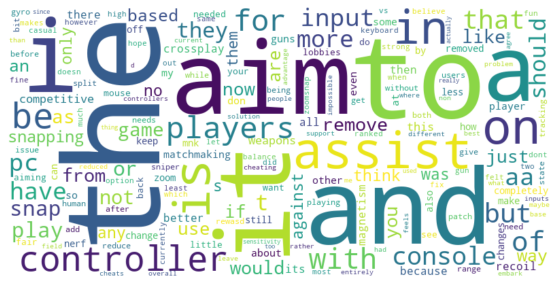

In [109]:
# Plotting the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('word_cloud.png', bbox_inches='tight', pad_inches=0.1)
plt.show()